## __Problem 1__


Type problem

In [83]:
# Import packages for executing query 
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

## Query restrictions to keep in mind while writing SQL:
 - We __SELECT TOP (100,000)__ sources from Gaiadr2.gaia_source
 - Parallax > 0 ( to avoid negative parallaxes for now...)
 - Parallax errors < 10 percent (i.e parallax/parallax_error < 0.10 )
 
    SQL Query Form: 
        SELECT TOP (100,000)
        solution_id, ra, dec, parallax, parallax_error, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag
        FROM gaiadr2.gaia_source 
        WHERE parallax > 0 % avoid negative parallaxes for the moment
        AND abs(parallax/parallax_error) < 0.10 % parallax error restriction





  
 Apply distance modulus 
 
 
G - Mg = 5log10(d/10) 
with d[pc]

- first plot with distances <0.1 kpc
- 2nd plot with distances 2-3 kpc 
 

In [41]:
# Query source with parallax errors of <10 percent

query = Gaia.launch_job_async("SELECT TOP (10) \
solution_id, ra, dec, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, parallax, parallax_error \
FROM gaiadr2.gaia_source \
WHERE abs(parallax/parallax_error)<0.10\;", dump_to_file=True)



500


Exception: 500

In [37]:
job2 = Gaia.launch_job_async("SELECT * \
FROM gaiadr1.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',56.75,24.1167,2))=1 \
AND abs(pmra_error/pmra)<0.10 \
AND abs(pmdec_error/pmdec)<0.10 \
AND pmra IS NOT NULL AND abs(pmra)>0 \
AND pmdec IS NOT NULL AND abs(pmdec)>0;", dump_to_file=True)




500


Exception: 500

In [42]:
%%capture
j = job2.get_results()

In [71]:
parallax = j['parallax']
parallax_error = j['parallax_error']

d = 1/abs(parallax)

g = j['phot_g_mean_mag']

In [73]:

Mg = g - 5*np.log10(d/10)

(33.17613238409269, 0.25352267683812335)

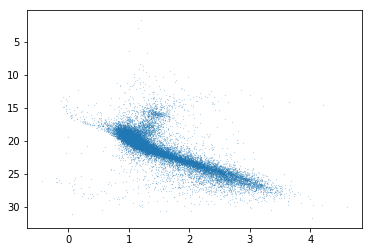

In [81]:
col = j['phot_bp_mean_mag'] - j['phot_rp_mean_mag']


plt.scatter(col, Mg, s=0.01)
plt.ylim(plt.ylim()[::-1])

# Problem 2 


Solution: 

    Part (a): 

    We can utilize the distance luminosity function for a given star with Luminosity (L), distance (R) and Flux (F)

\begin{equation*}
L = \frac{F}{4\pi R^2}
\end{equation*}


    Further, we're also able to relate the Flux of a source by its temeprature using Stefan-Boltzman relation: 

\begin{equation*}
F = \sigma T^4
\end{equation*}


    Given two stars with 
$${(L_1, R_1, T_1)}$$ 
    
$${(L_2, R_2, T_2)}$$

    Their definig relationships can be expressed as following : 


\begin{equation*}
\frac{L_1}{L_2} = \frac{F_1}{4\pi R_{1}^2} \frac{4\pi R_{2}^2}{F_2}
\end{equation*}

    By simiplifying terms we conclude: 
\begin{equation*}
\frac{L_1}{L_2}={\Bigl({\frac{T_1}{T_2}}\Bigr)}^4 {\Bigl({\frac{R_2}{R_1}}\Bigr)}^2 
\end{equation*}
        

    Part (b):
    
    We can now derive an approximate radius estimate for Betelgeuse. Given T=3370K and L=72100 Lsolar:
    
\begin{equation*}
\frac{L_B}{L_\odot}={\Bigl({\frac{T_B}{T_\odot}}\Bigr)}^4 {\Bigl({\frac{R_\odot}{R_B}}\Bigr)}^2 
\end{equation*}    
    
    We can now numerically estimate the approximate value of betelgeuse:
    
    
\begin{equation*}
\frac{72100*L_\odot}{L_\odot}={\Bigl({\frac{T_B}{T_\odot}}\Bigr)}^4 {\Bigl({\frac{R_\odot}{R_B}}\Bigr)}^2 
\end{equation*}   